In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [52]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

In [62]:
tokenizer= Tokenizer()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print("Total words: ", total_words)

Total words:  263


In [70]:
input_sequences = []
for line in corpus:
    seq = tokenizer.texts_to_sequences([line])[0]
    #print(seq)
    for i in range(1, len(seq)):
        #print(seq[0:i+1])
        input_sequences.append(seq[0:i+1])

# pad_sequences

max_sequence_len = max([len(x) for x in input_sequences])
pad_input_sequences = pad_sequences(input_sequences,
                maxlen = max_sequence_len, padding='pre')

# create data and labels
data = pad_input_sequences[:, :-1]
labels = pad_input_sequences[:, -1] 

In [79]:
max_sequence_len

11

In [74]:
model = tf.keras.Sequential([
    Embedding(input_dim = total_words, output_dim = 64,
             input_length = max_sequence_len),
    Bidirectional(LSTM(64)),
    Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(total_words, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11, 64)            16832     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 263)               8679      
Total params: 95,687
Trainable params: 95,687
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model.fit(x = data, y = labels, epochs = 500, verbose=2)

Epoch 1/500
15/15 - 0s - loss: 0.1846 - accuracy: 0.9227
Epoch 2/500
15/15 - 0s - loss: 0.1840 - accuracy: 0.9272
Epoch 3/500
15/15 - 0s - loss: 0.1597 - accuracy: 0.9404
Epoch 4/500
15/15 - 0s - loss: 0.1969 - accuracy: 0.9227
Epoch 5/500
15/15 - 0s - loss: 0.1868 - accuracy: 0.9205
Epoch 6/500
15/15 - 0s - loss: 0.2087 - accuracy: 0.9161
Epoch 7/500
15/15 - 0s - loss: 0.1767 - accuracy: 0.9316
Epoch 8/500
15/15 - 0s - loss: 0.1863 - accuracy: 0.9294
Epoch 9/500
15/15 - 0s - loss: 0.2043 - accuracy: 0.9227
Epoch 10/500
15/15 - 0s - loss: 0.1826 - accuracy: 0.9294
Epoch 11/500
15/15 - 0s - loss: 0.2343 - accuracy: 0.9161
Epoch 12/500
15/15 - 0s - loss: 0.2086 - accuracy: 0.9382
Epoch 13/500
15/15 - 0s - loss: 0.1867 - accuracy: 0.9272
Epoch 14/500
15/15 - 0s - loss: 0.1792 - accuracy: 0.9360
Epoch 15/500
15/15 - 0s - loss: 0.2098 - accuracy: 0.9316
Epoch 16/500
15/15 - 0s - loss: 0.1735 - accuracy: 0.9426
Epoch 17/500
15/15 - 0s - loss: 0.1900 - accuracy: 0.9183
Epoch 18/500
15/15 - 0s

Epoch 142/500
15/15 - 0s - loss: 0.1731 - accuracy: 0.9294
Epoch 143/500
15/15 - 0s - loss: 0.1467 - accuracy: 0.9404
Epoch 144/500
15/15 - 0s - loss: 0.1552 - accuracy: 0.9294
Epoch 145/500
15/15 - 0s - loss: 0.1620 - accuracy: 0.9360
Epoch 146/500
15/15 - 0s - loss: 0.1524 - accuracy: 0.9382
Epoch 147/500
15/15 - 0s - loss: 0.1632 - accuracy: 0.9382
Epoch 148/500
15/15 - 0s - loss: 0.1744 - accuracy: 0.9382
Epoch 149/500
15/15 - 0s - loss: 0.1778 - accuracy: 0.9205
Epoch 150/500
15/15 - 0s - loss: 0.1792 - accuracy: 0.9294
Epoch 151/500
15/15 - 0s - loss: 0.2090 - accuracy: 0.9205
Epoch 152/500
15/15 - 0s - loss: 0.1684 - accuracy: 0.9249
Epoch 153/500
15/15 - 0s - loss: 0.1680 - accuracy: 0.9272
Epoch 154/500
15/15 - 0s - loss: 0.1825 - accuracy: 0.9249
Epoch 155/500
15/15 - 0s - loss: 0.1708 - accuracy: 0.9227
Epoch 156/500
15/15 - 0s - loss: 0.1755 - accuracy: 0.9272
Epoch 157/500
15/15 - 0s - loss: 0.1600 - accuracy: 0.9448
Epoch 158/500
15/15 - 0s - loss: 0.1526 - accuracy: 0.94

Epoch 281/500
15/15 - 0s - loss: 0.1676 - accuracy: 0.9205
Epoch 282/500
15/15 - 0s - loss: 0.1877 - accuracy: 0.9227
Epoch 283/500
15/15 - 0s - loss: 0.1767 - accuracy: 0.9272
Epoch 284/500
15/15 - 0s - loss: 0.1805 - accuracy: 0.9205
Epoch 285/500
15/15 - 0s - loss: 0.1672 - accuracy: 0.9272
Epoch 286/500
15/15 - 0s - loss: 0.1517 - accuracy: 0.9294
Epoch 287/500
15/15 - 0s - loss: 0.1569 - accuracy: 0.9316
Epoch 288/500
15/15 - 0s - loss: 0.1398 - accuracy: 0.9426
Epoch 289/500
15/15 - 0s - loss: 0.1562 - accuracy: 0.9382
Epoch 290/500
15/15 - 0s - loss: 0.1277 - accuracy: 0.9470
Epoch 291/500
15/15 - 0s - loss: 0.1493 - accuracy: 0.9382
Epoch 292/500
15/15 - 0s - loss: 0.1658 - accuracy: 0.9316
Epoch 293/500
15/15 - 0s - loss: 0.1545 - accuracy: 0.9316
Epoch 294/500
15/15 - 0s - loss: 0.1402 - accuracy: 0.9426
Epoch 295/500
15/15 - 0s - loss: 0.1714 - accuracy: 0.9272
Epoch 296/500
15/15 - 0s - loss: 0.1461 - accuracy: 0.9338
Epoch 297/500
15/15 - 0s - loss: 0.1570 - accuracy: 0.92

Epoch 420/500
15/15 - 0s - loss: 0.1389 - accuracy: 0.9426
Epoch 421/500
15/15 - 0s - loss: 0.1616 - accuracy: 0.9205
Epoch 422/500
15/15 - 0s - loss: 0.1268 - accuracy: 0.9338
Epoch 423/500
15/15 - 0s - loss: 0.1426 - accuracy: 0.9360
Epoch 424/500
15/15 - 0s - loss: 0.1308 - accuracy: 0.9426
Epoch 425/500
15/15 - 0s - loss: 0.1436 - accuracy: 0.9227
Epoch 426/500
15/15 - 0s - loss: 0.1690 - accuracy: 0.9294
Epoch 427/500
15/15 - 0s - loss: 0.1758 - accuracy: 0.9183
Epoch 428/500
15/15 - 0s - loss: 0.1900 - accuracy: 0.9227
Epoch 429/500
15/15 - 0s - loss: 0.1535 - accuracy: 0.9316
Epoch 430/500
15/15 - 0s - loss: 0.1516 - accuracy: 0.9249
Epoch 431/500
15/15 - 0s - loss: 0.1480 - accuracy: 0.9338
Epoch 432/500
15/15 - 0s - loss: 0.1439 - accuracy: 0.9360
Epoch 433/500
15/15 - 0s - loss: 0.1513 - accuracy: 0.9249
Epoch 434/500
15/15 - 0s - loss: 0.1291 - accuracy: 0.9360
Epoch 435/500
15/15 - 0s - loss: 0.1569 - accuracy: 0.9227
Epoch 436/500
15/15 - 0s - loss: 0.1438 - accuracy: 0.94

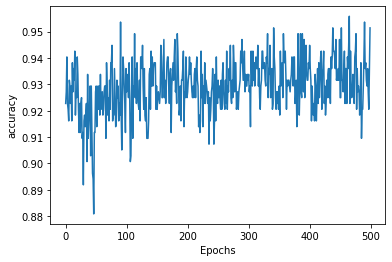

In [78]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [106]:
index_to_words =dict([(key, word) for (word, key) in 
                     tokenizer.word_index.items()])

In [112]:
seed_text = "Phong play games"
next_words = 10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])
    pad_token_list = pad_sequences(token_list,
                                  padding='pre', 
                                  maxlen = 100)
    print(pad_token_list)
    new_word = np.argmax(model.predict(pad_token_list))
    print(new_word)
    seed_text += " {}".format(index_to_words[new_word])
    
    print(seed_text)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
20
Phong play games til
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 20]]
167
Phong play games til youd
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  20 167]]
25
Phong pla

In [93]:
seed_text = ['love you more than me']
x=tokenizer.texts_to_sequences(seed_text)

In [97]:
x

[[52]]

In [96]:
pad_sequences(x,padding='pre', maxlen = max_sequence_len-1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 52]], dtype=int32)